# Week 6 : Adult Income Dataset
---

**METADATA** <br>

age: Age of the individual (continuous) <br>
workclass: Employment status, including Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked <br>
fnlwgt: Final weight, an integer that reflects the number of people represented by the sample (continuous) <br>
education: Highest level of education attained, including Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool <br>
education-num: Numeric representation of education level (continuous) <br>
marital-status: Marital status categories, including Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse <br>
occupation: Job type, including Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces <br>
relationship: Relationship status, including Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried <br>
race: Race of the individual, including White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black <br>
sex: Gender of the individual, including Female and Male <br>
capital-gain: Income from the sale of assets (continuous) <br>
capital-loss: Loss from the sale of assets (continuous) <br>
hours-per-week: Number of hours worked per week (continuous) <br>
native-country: Country of origin, including United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US (Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinidad&Tobago, Peru, Hong, Holand-Netherlands <br>
class: Income classification, indicating whether the income is greater than 50K (>50K) or less than or equal to 50K (<=50K) <br>

## Import Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

## Load Dataset

1. Import dataset <br>
Display 10 sample rows from the dataset

In [63]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/keziaelice/Dataset/refs/heads/main/adult.csv')
df.sample(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
11219,67,Private,220283,HS-grad,9,Divorced,Sales,Not-in-family,White,Female,0,0,20,United-States,<=50K
44322,48,Private,70668,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,50,United-States,<=50K
9168,23,Local-gov,255252,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,20,United-States,<=50K
2975,55,Private,125147,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8641,30,Private,246439,Assoc-acdm,12,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,<=50K
7441,23,Private,246965,Some-college,10,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
48621,75,Self-emp-not-inc,192813,Masters,14,Widowed,Sales,Not-in-family,White,Male,0,0,45,United-States,<=50K
43381,71,?,177906,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
2989,50,Self-emp-inc,177487,HS-grad,9,Married-civ-spouse,Sales,Wife,White,Female,0,0,30,United-States,<=50K
34179,54,Private,346014,Some-college,10,Married-civ-spouse,Craft-repair,Wife,White,Female,0,0,40,United-States,<=50K


## Exploratory Data Analysis

2. Display the info column

In [64]:
#2
df.info()

# Dataset ini memiliki 48842 baris, dengan 15 kolom.
# Seluruh kolom dalam dataset ini tidak memuat missing values (ditandai dengan 48842 non-null pada setiap kolomnya).
# Kolom age, fnlwgt, educational-num, capital-gain, capital-loss, hours-per-week memiliki data type int64, sisanya memiliki data type object.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


3. Show describe column

In [65]:
#3
df.describe()

# Menampilkan summary statistics seperti mean, standard deviation, quartile, serta nilai minimum dan maksimum untuk masing-masing kolom.

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


4. Display the number of each unique value in diagnosis column (including NaN)

In [66]:
#4
income_count = df['income'].value_counts(dropna=False)
print(income_count)
print()

workclass_count = df['workclass'].value_counts(dropna=False)
print(workclass_count)
print()

education_count = df['education'].value_counts(dropna=False)
print(education_count)
print()

maritalstatus_count = df['marital-status'].value_counts(dropna=False)
print(maritalstatus_count)
print()

occupation_count = df['occupation'].value_counts(dropna=False)
print(occupation_count)
print()

relationship_count = df['relationship'].value_counts(dropna=False)
print(relationship_count)
print()

race_count = df['race'].value_counts(dropna=False)
print(race_count)
print()

gender_count = df['gender'].value_counts(dropna=False)
print(gender_count)
print()

nativecountry_count = df['native-country'].value_counts(dropna=False)
print(nativecountry_count)
print()

# Ada 2 unique values pada kolom income, yaitu <=50K dan >50K, dimana masing-masing memiliki 37155 data dan 11687 data.
# Ada 9 unique values pada kolom workclass, salah satunya value ? yang memiliki 2799 data dan akan dianggap sebagai missing values
# Ada 16 unique values pada kolom education
# Ada 7 unique values pada kolom marital-status
# Terdapat 14 unique values dalam kolom occupation, termasuk value ? yang memiliki 2809 data dan akan dianggap sebagai missing values
# Terdapat 6 unique values dalam kolom relationship (Husband, Not-in-family, Own-child, Unmarried, Wife, dan Other-relative)
# Terdapat 5 unique values dalam kolom race (White, Black, Asian-Pac-Islander, Amer-Indian-Eskimo, dan Other)
# Terdapat 2 unique values dalam kolom gender, yaitu Male dan Female
# Terdapat 41 nilai unik dalam kolom native-country, termasuk value ? yang memiliki 857 data dan akan dianggap sebagai missing values

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

occupation
Prof-s

5. Replace ? values in workclass, occupation, and native-country columns with NaN

In [67]:
#5
df.replace('?', pd.NA, inplace=True)

# Mengganti setiap nilai ? dalam dataset dengan NaN.
# inplace=True memastikan perubahan dilakukan langsung pada dataset tanpa perlu menyimpannya ke variabel baru.

6. Drop missing values (NaN)

In [68]:
#6
df.dropna(inplace=True)

# Menghapus semua baris yang mengandung nilai ?

7. Recheck missing value

In [69]:
#7
df.isnull().sum()

# Tidak ada missing value pada dataset ini

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0




8. Visualization

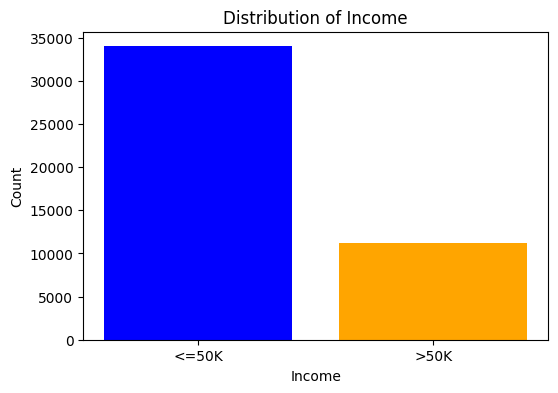

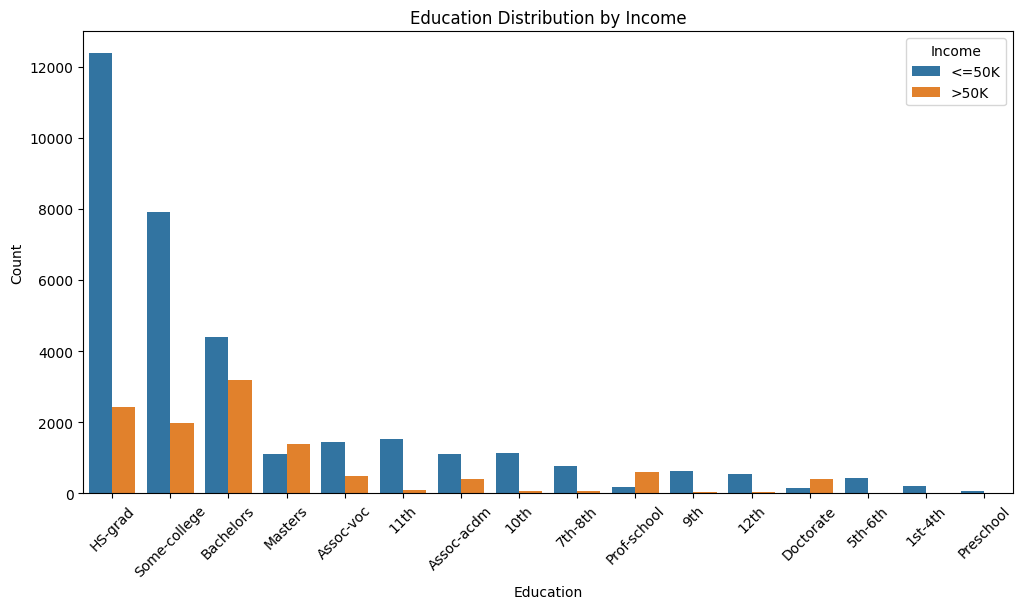

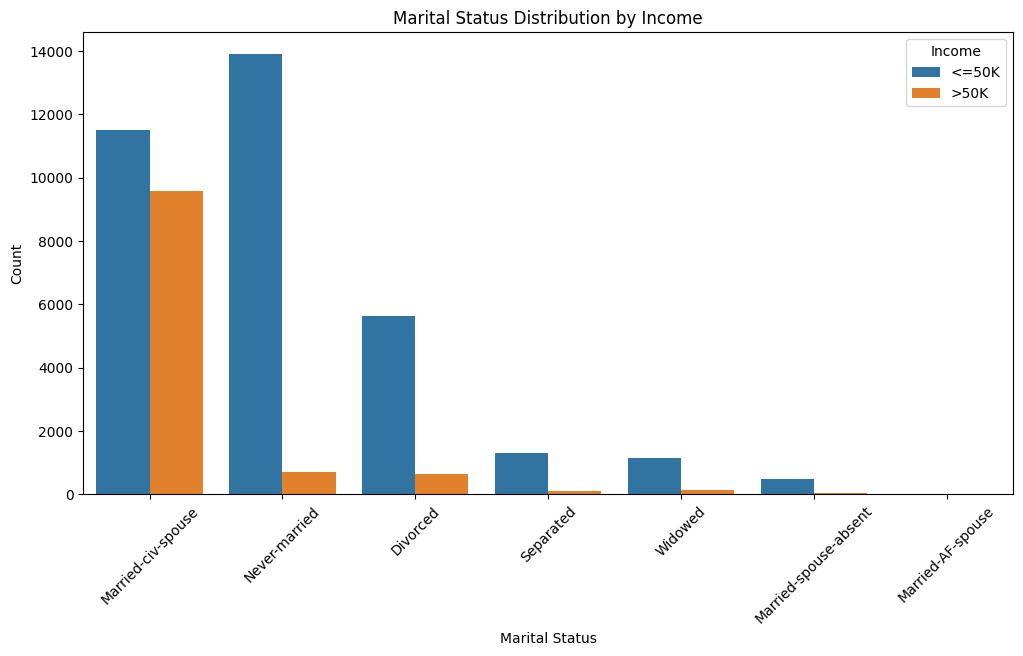

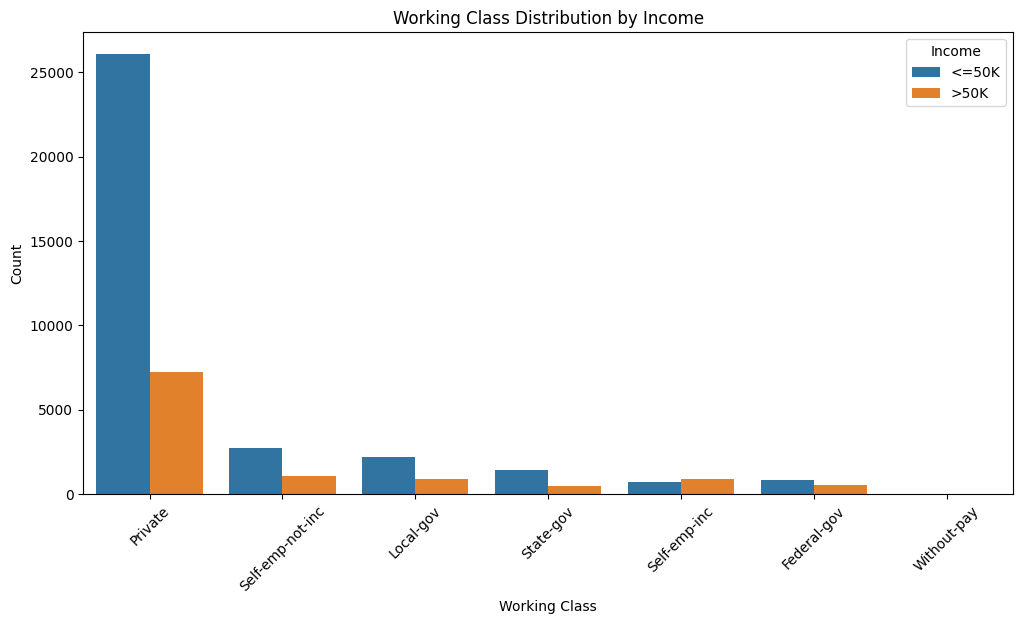

In [70]:
#8 Bar Chart
income_counts = df['income'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(income_counts.index, income_counts.values, color=['blue', 'orange'])
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.xticks([0, 1], ['<=50K', '>50K'])
plt.show()
# Sekitar 35000 data memiliki pendapatan kurang dari atau sama dengan 50000, sedangkan sekitar 10000 data sisanya memiliki pendapatan lebih dari 50000.
# Hal ini menunjukkan data yang kurang seimbang, sehingga langkah tambahan seperti oversampling dan undersampling mungkin dapat diperlukan.

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='education', hue='income', order=df['education'].value_counts().index)
plt.title('Education Distribution by Income')
plt.xlabel('Education')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()
# Bar chart ini menunjukkan distribusi tingkat pendidikan berdasarkan tingkat pendapatan.
# Untuk pendapatan <=50K, tingkat pendidikan terbanyak adalah HS-grad (High School Graduate).
# Sedangkan untuk pendapatan >50K, tingkat pendidikan terbanyak adalah Bachelors.
# Secara umum, semakin tinggi tingkat pendidikan, semakin banyak orang yang berpendapatan >50K.

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='marital-status', hue='income', order=df['marital-status'].value_counts().index)
plt.title('Marital Status Distribution by Income')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()
# Bar chart ini menunjukkan distribusi status pernikahan berdasarkan tingkat pendapatan.
# Untuk pendapatan ≤50K, status pernikahan yang paling banyak adalah "Married-civ-spouse" (menikah dan tinggal bersama pasangan).
# Sementara untuk pendapatan >50K, status pernikahan yang paling banyak juga "Married-civ-spouse".
# Secara umum, orang dengan status pernikahan "Married-civ-spouse" memiliki jumlah yang paling banyak, baik untuk pendapatan ≤50K maupun >50K.

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='workclass', hue='income', order=df['workclass'].value_counts().index)
plt.title('Working Class Distribution by Income')
plt.xlabel('Working Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income')
plt.show()
# Bar chart ini menunjukkan distribusi kelas pekerja berdasarkan tingkat pendapatan.
# Untuk pendapatan ≤50K, kelas pekerja yang paling banyak adalah "Private" (sektor swasta).
# Sedangkan untuk pendapatan >50K, kelas pekerja yang paling banyak juga "Private".
# Secara umum, kelas pekerja "Private" memiliki jumlah yang paling banyak, baik untuk pendapatan ≤50K maupun >50K.

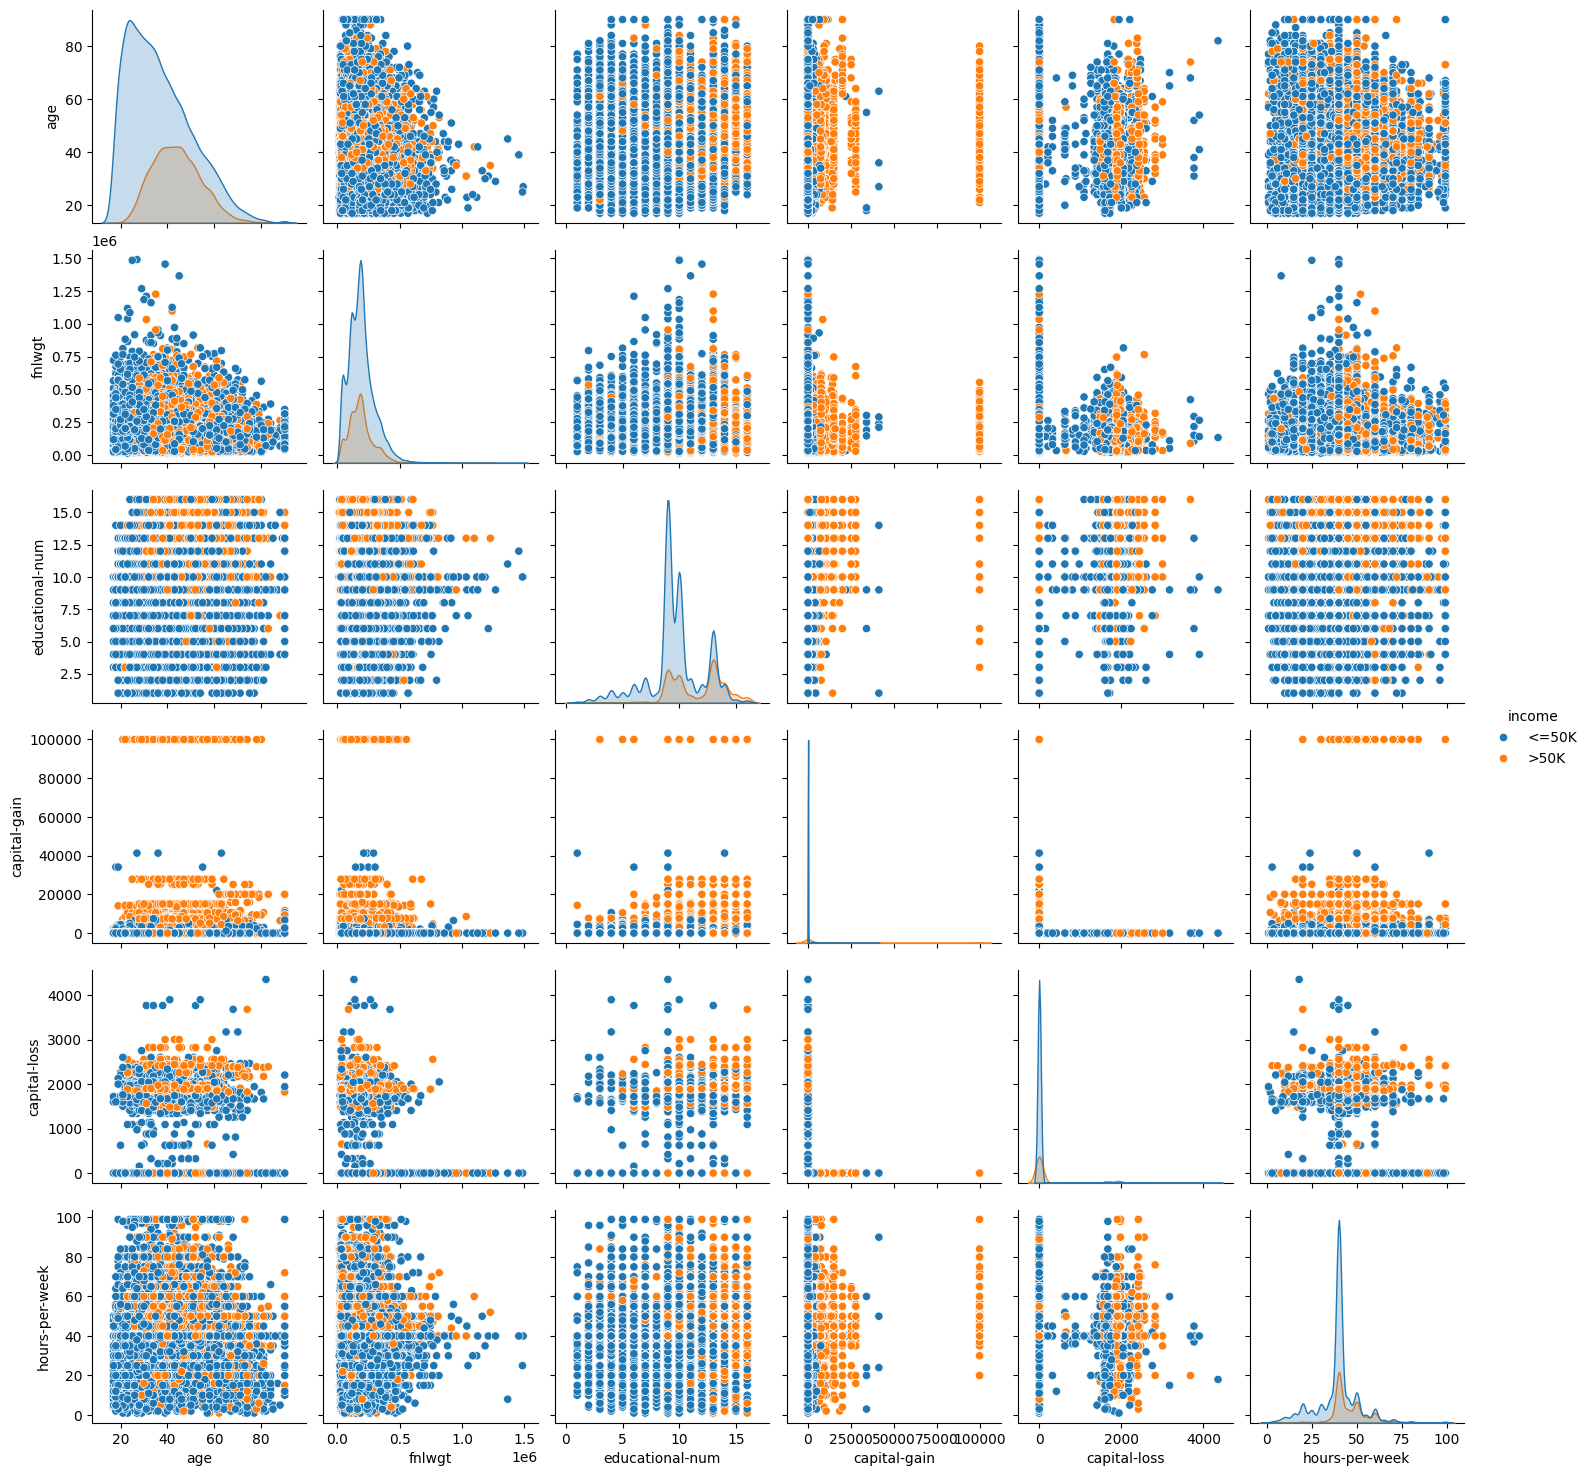

In [71]:
#8 Pair Plot
sns.pairplot(df, hue='income')
plt.show()

# - Age and Income: Individu yang lebih tua cenderung berada dalam kategori >50K, ditunjukkan dengan titik oranye yang mengelompok pada usia yang lebih tinggi.
# - Education and Income: Tingkat pendidikan yang lebih tinggi berkorelasi dengan pendapatan yang lebih tinggi, dengan pengelompokan titik oranye yang terlihat pada tingkat pendidikan yang lebih tinggi.
# - Capital-Gain/Capital-Loss and Income: Individu dengan keuntungan atau kerugian modal yang besar cenderung memiliki pendapatan di atas 50K.
# - Hours per Week and Income: Mereka yang bekerja lebih banyak jam per minggu cenderung memperoleh >50K.
# Pair plot ini memberikan wawasan mengenai hubungan fitur dan dampak potensial terhadap income, membantu memahami data lebih baik untuk analisis lebih lanjut, seperti klasifikasi.

9. Encode categorical columns and display the results

In [72]:
#9
label_encoder = LabelEncoder()

df['workclass'] = label_encoder.fit_transform(df['workclass'])
df['education'] = label_encoder.fit_transform(df['education'])
df['marital-status'] = label_encoder.fit_transform(df['marital-status'])
df['occupation'] = label_encoder.fit_transform(df['occupation'])
df['relationship'] = label_encoder.fit_transform(df['relationship'])
df['race'] = label_encoder.fit_transform(df['race'])
df['gender'] = label_encoder.fit_transform(df['gender'])
df['native-country'] = label_encoder.fit_transform(df['native-country'])
df['income'] = label_encoder.fit_transform(df['income'])
df.head()

# Mengubah nilai pada categorical columns menjadi numeric kemudian menampilkan 5 baris data pertama.

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


10. Create a heatmap to see the correlation

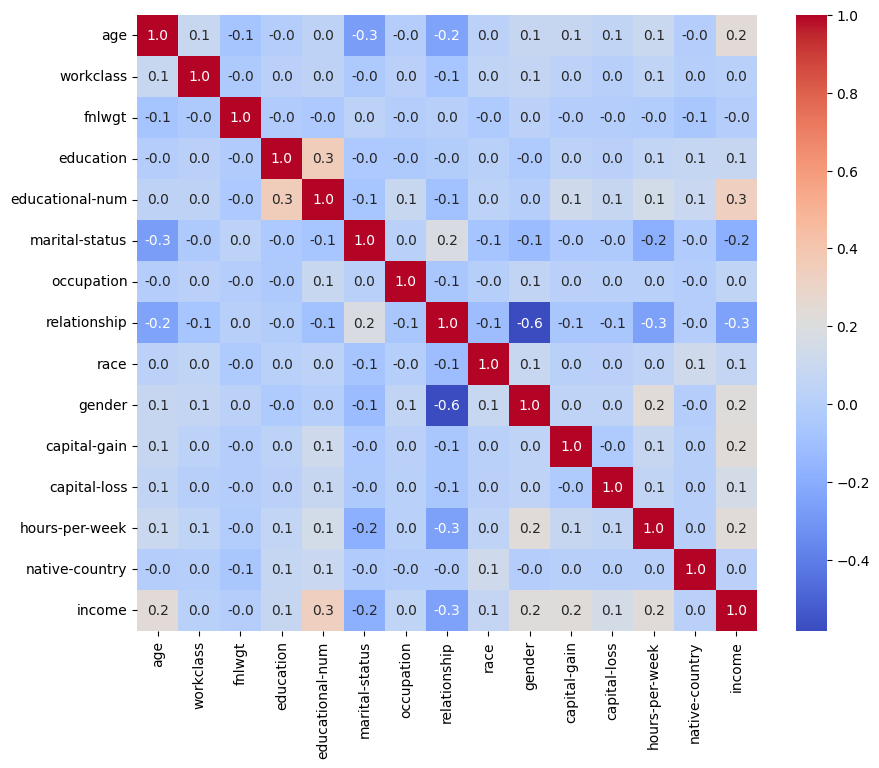

In [73]:
#10
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.show()

# Warna biru pada heatmap menandakan korelasi negatif. Jika satu variabel meningkat, variabel lainnya cenderung menurun.
# Warna merah menandakan korelasi positif. Jika satu variabel meningkat, variabel lainnya juga cenderung meningkat.
# Warna abu-abu atau warna-warna di antara biru dan merah menunjukkan korelasi yang lebih lemah atau hampir tidak ada korelasi yang signifikan.
# Dari heatmap ini, dapat disimpulkan:
# - Educational-num and Income (0,3): Di antara fitur-fitur tersebut, angka pendidikan (tahun pendidikan) memiliki korelasi positif dengan pendapatan (korelasi 0,3), yang menunjukkan bahwa pencapaian pendidikan yang lebih tinggi dikaitkan dengan pendapatan yang lebih tinggi. Meskipun 0,3 tergolong sedang, ini adalah salah satu korelasi yang lebih kuat dengan pendapatan dalam kumpulan data ini.
# - Capital-gain and Income (0,2): Keuntungan modal juga menunjukkan korelasi positif dengan pendapatan. Ini menunjukkan bahwa individu dengan keuntungan modal cenderung memiliki pendapatan yang lebih tinggi. Meskipun 0,2 merupakan korelasi sedang, ini tetap memberikan beberapa wawasan prediktif tentang tingkat pendapatan.
# - Age and Income (0,2): Usia memiliki korelasi positif sedang dengan pendapatan. Ini menunjukkan bahwa individu yang lebih tua, kemungkinan karena pengalaman atau senioritas, cenderung memperoleh penghasilan lebih banyak.
# - Capital-loss and Income (0,1): Kerugian modal memiliki sedikit korelasi positif dengan pendapatan, yang dapat berarti bahwa orang dengan beberapa tingkat investasi keuangan (dan potensi kerugian) dikaitkan dengan tingkat pendapatan yang lebih tinggi.
# Korelasi Kuat Lainnya:
# - Capital-gain and Capital-loss (0,1): Kedua fitur ini sedikit berkorelasi, mungkin karena keduanya berkaitan dengan transaksi keuangan, investasi, atau aktivitas yang berhubungan dengan kekayaan.
# - Relationship and Gender (-0,6): Ada korelasi negatif yang kuat antara hubungan dan jenis kelamin. Ini mungkin menunjukkan bahwa status hubungan tertentu (misalnya, menikah, lajang) memiliki pola yang berbeda antara jenis kelamin dalam kumpulan data ini.
# - Education and Educational-num (0,3): Pendidikan (tingkat) dan angka pendidikan (tahun) menunjukkan korelasi positif sedang, yang diharapkan karena keduanya mengukur pencapaian pendidikan.

# Kesimpulan:
# Heatmap ini menunjukkan bahwa angka pendidikan, keuntungan modal, dan usia memiliki korelasi positif terkuat dengan pendapatan dalam dataset ini. Meskipun korelasinya sedang, korelasi tersebut menunjukkan bahwa pendidikan tinggi, keuntungan modal, dan usia lanjut dikaitkan dengan pendapatan yang lebih tinggi. Fitur lain, seperti hubungan dan jenis kelamin, juga menunjukkan korelasi yang kuat tetapi kurang relevan untuk memprediksi pendapatan secara langsung.

## Machine Learning

1. Splitting X and y

In [74]:
#1
X = df.drop('income', axis=1)
y = df['income']

# Seluruh variabel kecuali income menjadi variabel independen (fitur yang akan digunakan untuk memprediksi) dan disimpan dalam X
# y menyimpan variabel income sebagai target variabel dependen yang ingin diprediksi

In [75]:
#2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Membagi data menjadi train data (75%) dan test data (25%) dengan random state 42

In [76]:
#3
X_train.shape, X_test.shape

# Menampilkan dimensi dari X_train dan X_test

((33916, 14), (11306, 14))

## Desicion Tree


---

a. Defining the model using criterion gini index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>

In [77]:
#a
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=4)
clf_gini.fit(X_train, y_train) # Fungsi ini melatih model decision tree menggunakan data X_train sebagai fitur dan y_train sebagai target. Model akan belajar dari data tersebut untuk memprediksi kelas yang tepat berdasarkan fitur yang diberikan.

# criterion='gini': Indeks Gini adalah metode yang umum digunakan dalam algoritma decision tree untuk memilih fitur mana yang paling baik dalam membagi data.
# random_state=42: Parameter ini digunakan untuk memastikan bahwa hasil pemodelan dapat dihasilkan kembali di lain waktu dengan konsisten.
# max_depth=4: Parameter ini membatasi kedalaman maksimum decision tree hingga 4. Hal ini mencegah model dari overfitting dengan meminimalkan kompleksitasnya.

DecisionTreeClassifier(max_depth=4, random_state=42)

In [78]:
#b
y_pred_gini = clf_gini.predict(X_test)

# Variabel y_pred_gini menyimpan hasil prediksi yang dihasilkan oleh model. Hasil ini akan berupa array atau daftar yang berisi kelas-kelas yang diprediksi untuk setiap baris dalam X_test, yang kemudian dapat digunakan untuk evaluasi model, seperti menghitung akurasi, presisi, dan metrik lainnya untuk menilai kinerja model.

In [79]:
#c
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Model accuracy score with criterion gini index:", accuracy_gini)

# Variabel accuracy_gini akan berisi nilai akurasi dari model klasifikasi, yang dapat berkisar antara 0 hingga 1 (atau 0% hingga 100% jika dinyatakan dalam persentase). Nilai yang lebih tinggi menunjukkan bahwa model lebih baik dalam memprediksi label dengan benar, dan ini memberikan informasi penting tentang seberapa baik model tersebut bekerja dalam klasifikasi data pengujian.
# Nilai akurasi 0.8440650981779586 (atau sekitar 84.4%) menunjukkan bahwa model yang menggunakan criterion gini berhasil memprediksi sekitar 84.4% dari seluruh sampel di data pengujian dengan benar.

Model accuracy score with criterion gini index: 0.8440650981779586


In [80]:
#d
# Menghitung dan mencetak score dari training set
train_score = clf_gini.score(X_train, y_train)
print(f"Training set score: {train_score:.4f}")

# Menghitung dan mencetak score dari test set
test_score = clf_gini.score(X_test, y_test)
print(f"Test set score: {test_score:.4f}")

# Model memiliki akurasi 83.9% pada train data dan 84.4% pada test data. Perbedaan yang tipis antara skor training dan test ini menunjukkan bahwa kemungkinan besar model tidak mengalami overfitting.

Training set score: 0.8392
Test set score: 0.8441


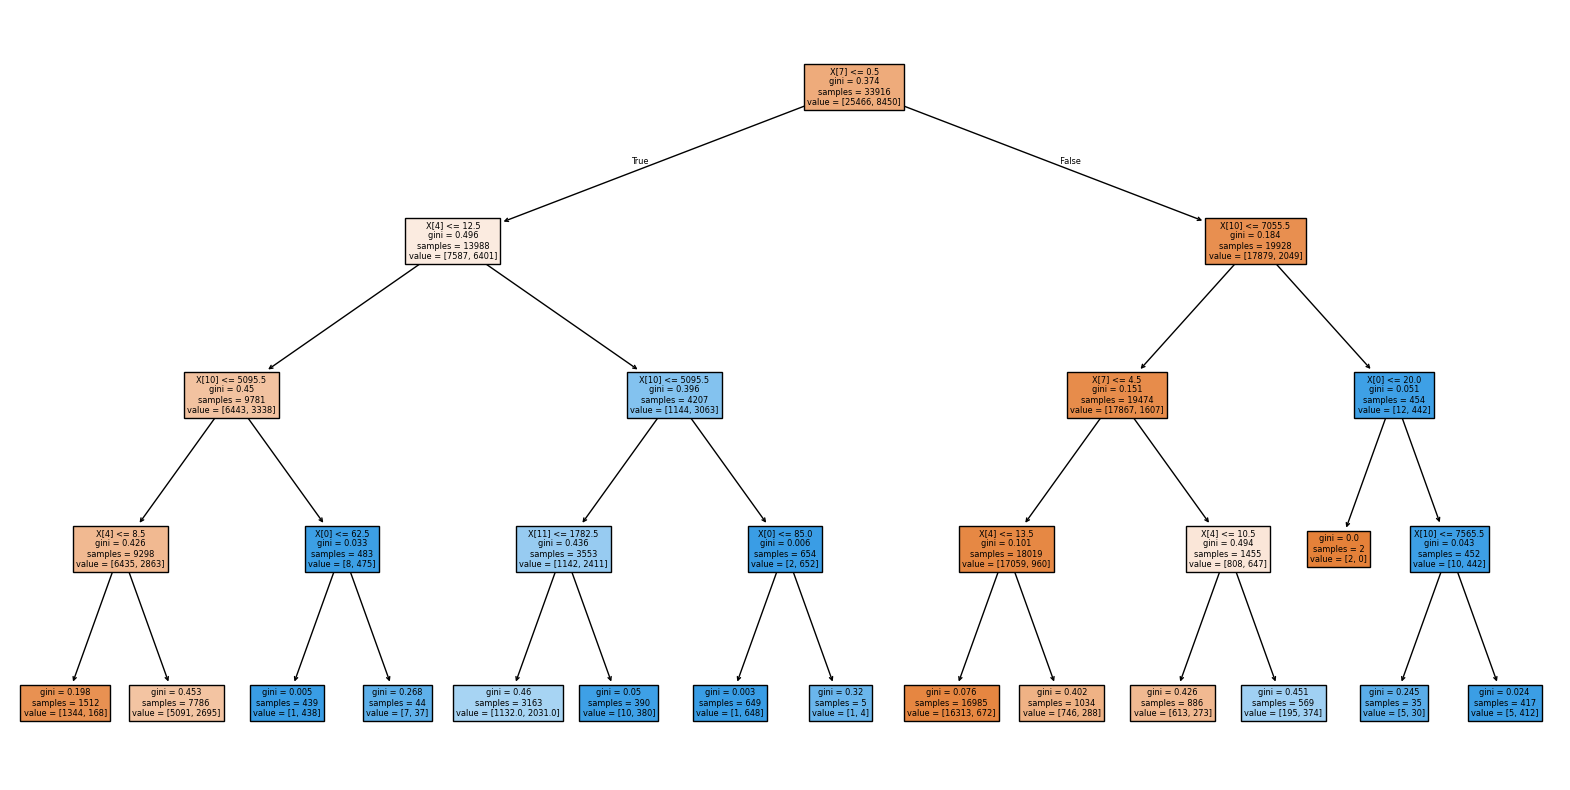

In [81]:
#e
plt.figure(figsize=(20, 10))
tree.plot_tree(clf_gini, filled=True, feature_names=[f"X[{i}]" for i in range(X.shape[1])])
plt.show()

# Decision tree digunakan untuk mengklasifikasikan dataset menjadi kelas income <=50K dan >50.
# Setiap node menunjukkan fitur yang digunakan untuk membagi data pada titik tertentu, seperti X[7] (relationship), X[4] (educational-num), atau X[10] (capital_gain).
# Gini menunjukkan ketidakpastian dalam node tersebut. Semakin rendah nilai gini, semakin baik pembagian datanya.
# Pada setiap node, data dibagi berdasarkan kondisi tertentu dari fitur yang diukur. Contohnya, X[7] <= 0.5 pada node pertama adalah kondisi pembagian pertama.
# Node daun di akhir cabang menunjukkan hasil klasifikasi akhir berdasarkan nilai sampel di sana. Sebagai contoh, cabang yang memiliki gini = 0.0 berarti semua data pada node tersebut berada dalam satu kelas.

In [82]:
#f
cm_gini = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix Gini Index")
print(cm_gini)

# Code ini membuat dan mencetak confusion matrix untuk mengevaluasi performa model klasifikasi pada data pengujian. Confusion matrix adalah tabel yang menunjukkan jumlah prediksi benar dan salah yang dibuat oleh model untuk setiap kelas.
# 8113: Model memprediksi negatif dengan benar (True Negative).
# 435: Model salah memprediksi sebagai positif ketika sebenarnya negatif (False Positive).
# 1328: Model salah memprediksi sebagai negatif ketika sebenarnya positif (False Negative).
# 1430: Model memprediksi positif dengan benar (True Positive).

# Kesimpulan:
# Model menunjukkan performa baik dalam mengidentifikasi kelas negatif dengan 8113 True Negatives dan juga mampu mengidentifikasi sejumlah positif dengan 1430 True Positives. Namun, terdapat 1328 False Negatives, yang menunjukkan bahwa model mengalami tantangan dalam mengenali semua contoh positif, sehingga ada ruang untuk perbaikan pada prediksi kelas positif. Meskipun demikian, performa model untuk kelas negatif cukup baik, namun meningkatkan akurasi pada kelas positif akan membuat model lebih seimbang dan akurat secara keseluruhan.

Confusion Matrix Gini Index
[[8113  435]
 [1328 1430]]


In [83]:
#g
cr_gini = classification_report(y_test, y_pred_gini)
print("Classification Report Gini Index")
print(cr_gini)

# Kelas 0 (8548 sampel):
# Precision: 0.86 berarti 86% dari prediksi kelas 0 adalah benar, dan sisanya adalah prediksi salah.
# Recall: 0.95 menunjukkan bahwa model berhasil mengidentifikasi 95% dari semua sampel yang benar-benar termasuk dalam kelas 0.
# F1-score: 0.90 adalah rata-rata harmonis dari precision dan recall, menunjukkan performa yang sangat baik untuk kelas ini.

# Kelas 1 (2758 sampel):
# Precision: 0.77 menunjukkan bahwa 77% dari prediksi untuk kelas 1 adalah benar.
# Recall: 0.52 berarti model berhasil mengidentifikasi 52% dari semua sampel aktual yang berada di kelas 1.
# F1-score: 0.62 mengindikasikan keseimbangan antara precision dan recall di kelas ini, namun performanya lebih rendah dibandingkan dengan kelas 0.

# Kesimpulan:
# Model Gini Index menunjukkan kinerja yang lebih baik pada kelas 0 (dengan nilai precision dan recall yang tinggi) dibandingkan dengan kelas 1, yang terlihat dari nilai recall yang lebih rendah. Akurasi keseluruhan sebesar 84% menunjukkan performa model yang cukup baik, tetapi masih ada ruang untuk peningkatan, terutama dalam meningkatkan recall untuk kelas 1 agar lebih seimbang dengan kelas 0.

Classification Report Gini Index
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      8548
           1       0.77      0.52      0.62      2758

    accuracy                           0.84     11306
   macro avg       0.81      0.73      0.76     11306
weighted avg       0.84      0.84      0.83     11306



## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>

In [84]:
#a
nb = GaussianNB()
nb.fit(X_train, y_train)

# Kode ini menggunakan model Gaussian Naive Bayes untuk mempelajari data training. Setelah pelatihan, model dapat digunakan untuk memprediksi kelas data baru dengan menggunakan asumsi bahwa fitur-fitur input mengikuti distribusi normal.

GaussianNB()

In [85]:
#b
y_pred_nb = nb.predict(X_test)

# Variabel y_pred_nb menyimpan hasil prediksi yang dihasilkan oleh model. Hasil ini akan berupa array atau daftar yang berisi kelas-kelas yang diprediksi untuk setiap baris dalam X_test, yang kemudian dapat digunakan untuk evaluasi model, seperti menghitung akurasi, presisi, dan metrik lainnya untuk menilai kinerja model.

In [86]:
#c
accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Model accuracy score with Naive Bayes:" , accuracy_nb)
# Variabel accuracy_nb akan berisi nilai akurasi dari model klasifikasi, yang dapat berkisar antara 0 hingga 1 (atau 0% hingga 100% jika dinyatakan dalam persentase). Nilai yang lebih tinggi menunjukkan bahwa model lebih baik dalam memprediksi label dengan benar, dan ini memberikan informasi penting tentang seberapa baik model tersebut bekerja dalam klasifikasi data pengujian.
# Nilai akurasi 0.7910843799752344 (atau sekitar 79.1%) menunjukkan bahwa model Naive Bayes berhasil memprediksi sekitar 79.1% dari seluruh sampel di data pengujian dengan benar.

Model accuracy score with Naive Bayes: 0.7910843799752344


In [87]:
#d
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

print("Confusion Matrix Naive Bayes")
print(conf_matrix_nb)

# Code ini membuat dan mencetak confusion matrix untuk mengevaluasi performa model klasifikasi pada data pengujian. Confusion matrix adalah tabel yang menunjukkan jumlah prediksi benar dan salah yang dibuat oleh model untuk setiap kelas.
# 8105: Model memprediksi negatif dengan benar (True Negative).
# 443: Model salah memprediksi sebagai positif ketika sebenarnya negatif (False Positive).
# 1919: Model salah memprediksi sebagai negatif ketika sebenarnya positif (False Negative).
# 839: Model memprediksi positif dengan benar (True Positive).

# Kesimpulan:
# Model menunjukkan performa yang baik dalam mengidentifikasi kelas negatif dengan 8105 True Negatives dan juga mampu mengidentifikasi sejumlah positif dengan 839 True Positives. Namun, terdapat 1919 False Negatives, yang menunjukkan bahwa model mengalami tantangan dalam mengenali semua contoh positif. Ini menunjukkan adanya ruang untuk perbaikan pada prediksi kelas positif. Performa model pada kelas negatif cukup baik, tetapi meningkatkan akurasi pada kelas positif akan membuat model lebih seimbang dan akurat secara keseluruhan.

Confusion Matrix Naive Bayes
[[8105  443]
 [1919  839]]


In [88]:
#e
class_report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report Naive Bayes")
print(class_report_nb)

# Kelas 0 (8548 sampel):
# Precision: 0.81 berarti 81% dari prediksi kelas 0 benar (sisanya adalah prediksi salah).
# Recall: 0.95 menunjukkan bahwa model berhasil mengidentifikasi 95% dari semua sampel kelas 0 yang benar.
# F1-score: 0.87 adalah rata-rata harmonis dari precision dan recall, menunjukkan performa yang baik di kelas ini.

# Kelas 1 (2758 sampel):
# Precision: 0.65 menunjukkan bahwa 65% dari prediksi untuk kelas 1 benar.
# Recall: 0.30 berarti model hanya berhasil mengidentifikasi 30% dari semua sampel aktual di kelas 1.
# F1-score: 0.42 mengindikasikan performa yang lebih rendah untuk kelas 1, terutama karena nilai recall yang rendah.

# Kesimpulan:
# Model Naive Bayes menunjukkan kinerja yang lebih baik pada kelas 0 dengan precision dan recall yang lebih tinggi dibandingkan dengan kelas 1. Akurasi keseluruhan sebesar 79% menunjukkan performa model yang cukup baik secara keseluruhan, namun performa untuk kelas 1 (positif) lebih rendah. Hal ini menunjukkan bahwa model dapat ditingkatkan lebih lanjut, terutama dalam hal recall pada kelas 1, agar mampu mengidentifikasi lebih banyak sampel positif dengan benar.

Classification Report Naive Bayes
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      8548
           1       0.65      0.30      0.42      2758

    accuracy                           0.79     11306
   macro avg       0.73      0.63      0.64     11306
weighted avg       0.77      0.79      0.76     11306



## K-NN


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>

In [89]:
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
classifier.fit(X_train, y_train)

# Fungsi ini melatih model K-NN menggunakan data X_train sebagai fitur dan y_train sebagai target. Model akan belajar dari data tersebut untuk memprediksi kelas yang tepat berdasarkan fitur yang diberikan.
# n_neighbors=7: Parameter ini menentukan jumlah tetangga terdekat yang akan dipertimbangkan saat membuat prediksi. Dalam hal ini, model akan melihat 7 tetangga terdekat dari data yang ingin diprediksi.
# metric='euclidean': Ini adalah jenis metrik yang digunakan untuk menghitung jarak antara titik data. Dalam kasus ini, jarak Euclidean akan digunakan, yang mengukur jarak "lurus" antara dua titik dalam ruang multidimensi.

KNeighborsClassifier(metric='euclidean', n_neighbors=7)

In [90]:
# b
y_pred_knn = classifier.predict(X_test)

# Variabel y_pred_knn menyimpan hasil prediksi yang dihasilkan oleh model. Hasil ini akan berupa array atau daftar yang berisi kelas-kelas yang diprediksi untuk setiap baris dalam X_test, yang kemudian dapat digunakan untuk evaluasi model, seperti menghitung akurasi, presisi, dan metrik lainnya untuk menilai kinerja model.

In [91]:
# c
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Model accuracy score with K-NN: " , accuracy_knn)

# Variabel accuracy_knn akan berisi nilai akurasi dari model klasifikasi, yang dapat berkisar antara 0 hingga 1 (atau 0% hingga 100% jika dinyatakan dalam persentase). Nilai yang lebih tinggi menunjukkan bahwa model lebih baik dalam memprediksi label dengan benar, dan ini memberikan informasi penting tentang seberapa baik model tersebut bekerja dalam klasifikasi data pengujian.
# Nilai akurasi 0.786838846630108 (atau sekitar 78.6%) menunjukkan bahwa model K-NN berhasil memprediksi sekitar 78.6% dari sampel data pengujian dengan benar.

Model accuracy score with K-NN:  0.786838846630108


In [92]:
#d
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix K-NN")
print(conf_matrix_knn)

# Code ini membuat dan mencetak confusion matrix untuk mengevaluasi performa model klasifikasi pada data pengujian. Confusion matrix adalah tabel yang menunjukkan jumlah prediksi benar dan salah yang dibuat oleh model untuk setiap kelas.
# 8080: Model memprediksi negatif dengan benar (True Negative).
# 468: Model salah memprediksi sebagai positif ketika sebenarnya negatif (False Positive).
# 1942: Model salah memprediksi sebagai negatif ketika sebenarnya positif (False Negative).
# 816: Model memprediksi positif dengan benar (True Positive).

# # Kesimpulan:
# Model menunjukkan performa yang cukup baik dalam mengidentifikasi kelas negatif dengan 8080 True Negatives. Model juga mampu mengidentifikasi sejumlah positif dengan 816 True Positives, tetapi terdapat 1942 False Negatives. Hal ini menunjukkan bahwa model memiliki tantangan dalam mengenali semua contoh positif, dan perbaikan pada prediksi kelas positif akan meningkatkan keseimbangan dan akurasi keseluruhan model. Performanya untuk kelas negatif sudah cukup baik, namun meningkatkan recall untuk kelas positif akan membuat model lebih efektif.

Confusion Matrix K-NN
[[8080  468]
 [1942  816]]


In [93]:
#e
class_report_knn = classification_report(y_test, y_pred_knn)
print("Classification Report K-NN")
print(class_report_knn)

# Kelas 0 (8548 sampel):
# - Precision: 0.81 berarti 81% dari prediksi untuk kelas 0 benar (sisanya adalah prediksi salah).
# - Recall: 0.95 menunjukkan bahwa model berhasil mengidentifikasi 95% dari semua sampel kelas 0 yang sebenarnya.
# - F1-score: 0.87 adalah rata-rata harmonis dari precision dan recall, menunjukkan performa yang kuat dalam memprediksi kelas 0.

# Kelas 1 (2758 sampel):
# - Precision: 0.64 berarti 64% dari prediksi untuk kelas 1 benar.
# - Recall: 0.30 menunjukkan bahwa model hanya berhasil mengidentifikasi 30% dari semua sampel aktual di kelas 1.
# - F1-score: 0.40 menunjukkan keseimbangan antara precision dan recall, namun performanya relatif rendah dibandingkan kelas 0.

# Kesimpulan:
# Model K-NN menunjukkan kinerja yang lebih baik dalam mengidentifikasi kelas 0 (dengan precision dan recall yang lebih tinggi) dibandingkan kelas 1. Akurasi keseluruhan model sebesar 79% menunjukkan performa yang cukup baik, tetapi model dapat ditingkatkan lebih lanjut, terutama pada precision dan recall untuk kelas 1, agar model lebih seimbang dalam memprediksi kedua kelas.

Classification Report K-NN
              precision    recall  f1-score   support

           0       0.81      0.95      0.87      8548
           1       0.64      0.30      0.40      2758

    accuracy                           0.79     11306
   macro avg       0.72      0.62      0.64     11306
weighted avg       0.76      0.79      0.76     11306

